Task 3 Clustering algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [2]:
df_customers= pd.read_csv(r'C:\Users\sakth\OneDrive\文档\eCommerce_Dataset_Assignment\Datasets\Customers.csv')
df_transactions = pd.read_csv(r'C:\Users\sakth\OneDrive\文档\eCommerce_Dataset_Assignment\Datasets\Transactions.csv')
data = pd.merge(df_customers, df_transactions, on='CustomerID')

data.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64


Calculating total_spent , average transcation and transaction count

In [6]:
customer_data = (
    data.groupby('CustomerID')
    .agg(total_spent=('TotalValue', 'sum'),avg_transaction_value=('TotalValue', 'mean'),transaction_count=('TransactionID', 'count'))
    .reset_index()
)

print(customer_data)

    CustomerID  total_spent  avg_transaction_value  transaction_count
0        C0001      3354.52             670.904000                  5
1        C0002      1862.74             465.685000                  4
2        C0003      2725.38             681.345000                  4
3        C0004      5354.88             669.360000                  8
4        C0005      2034.24             678.080000                  3
..         ...          ...                    ...                ...
194      C0196      4982.88            1245.720000                  4
195      C0197      1928.65             642.883333                  3
196      C0198       931.83             465.915000                  2
197      C0199      1979.28             494.820000                  4
198      C0200      4758.60             951.720000                  5

[199 rows x 4 columns]


In [10]:
# Using StandardScaler
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['total_spent', 'avg_transaction_value', 'transaction_count']])

customer_data_scaled

array([[-6.17014282e-02, -7.02634115e-02, -1.14581896e-02],
       [-8.77743532e-01, -9.34932971e-01, -4.67494136e-01],
       [-4.05857221e-01, -2.62713110e-02, -4.67494136e-01],
       [ 1.03254704e+00, -7.67688998e-02,  1.35664965e+00],
       [-7.83928612e-01, -4.00280592e-02, -9.23530083e-01],
       [ 4.15879421e-01,  1.55606020e+00, -4.67494136e-01],
       [-4.85482293e-01,  7.26220709e-01, -9.23530083e-01],
       [ 4.39970436e-01, -1.09724996e+00,  2.26872154e+00],
       [-1.40630171e+00, -1.63794564e+00, -9.23530083e-01],
       [-9.57166204e-01, -1.08786883e+00, -4.67494136e-01],
       [ 1.43695808e-01,  2.46146011e-01, -1.14581896e-02],
       [ 9.64923716e-01,  2.51719736e-01,  9.00613703e-01],
       [ 1.38575064e+00,  7.14772302e-01,  9.00613703e-01],
       [-1.72239508e+00, -1.55440798e+00, -1.83560198e+00],
       [-1.26353893e+00, -4.58587130e-01, -1.37956603e+00],
       [ 2.22697270e-01,  3.67845832e-01, -1.14581896e-02],
       [ 7.03751732e-01, -3.93332111e-01

Here we are going to using ELBOW Method to find the No-of-Cluster points

In [11]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data_scaled)
    inertia.append(kmeans.inertia_)

Ploting the graph to see the points

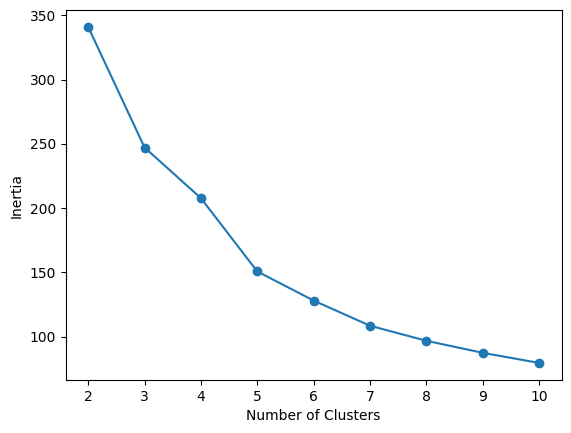

In [12]:
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The elbow seems to be at 4 clusters because the drop in inertia slows after that

In [13]:
#predicting the model
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

customer_data.head()

,CustomerID,total_spent,avg_transaction_value,transaction_count,Cluster
0,C0001,3354.52,670.904,5,3
1,C0002,1862.74,465.685,4,1
2,C0003,2725.38,681.345,4,3
3,C0004,5354.88,669.360,8,0
4,C0005,2034.24,678.080,3,3


Evaluating the score

In [16]:
db_index = davies_bouldin_score(customer_data_scaled, customer_data['Cluster'])
print("DB Index : ",db_index)

sil_score = silhouette_score(customer_data_scaled, customer_data['Cluster'])
print("Silhouette Score: ",sil_score)

DB Index :  1.060424039992303
Silhouette Score:  0.3135106549790538


our db score is good but Silhouette Score is moderate


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(customer_data_scaled)

In [18]:
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = customer_data['Cluster']

plot the clusters

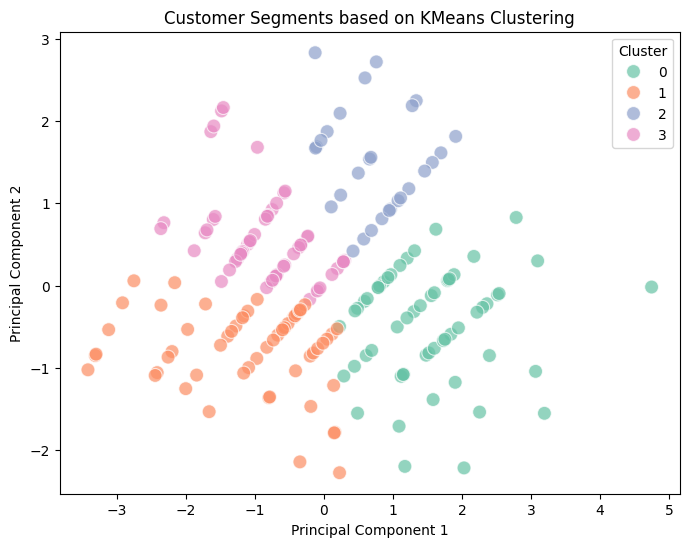

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100, alpha=0.7)
plt.title('Customer Segments based on KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.savefig('cluster_plot.png')

In [21]:
from fpdf import FPDF

In [22]:
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Clustering Report', 0, 1, 'C')
    
    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', 0, 0, 'C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(5)
    
    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()
        
    def add_cluster_plot(self, image_path):
        self.image(image_path, x=10, y=None, w=190)

In [23]:
pdf = PDF()
pdf.add_page()

In [27]:
pdf.chapter_title('Number of Clusters Formed')
pdf.chapter_body('4 (can be adjusted)')

pdf.chapter_title('Davies-Bouldin Index')
pdf.chapter_body(f'{db_index}')

pdf.chapter_title('Silhouette Score')
pdf.chapter_body(f'{sil_score}')

pdf.add_cluster_plot('cluster_plot.png')

In [28]:
pdf.output('Sakthirajkumar_K_Clustering.pdf .pdf')

print('PDF report generated successfully.')

PDF report generated successfully.
